In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 35.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompat

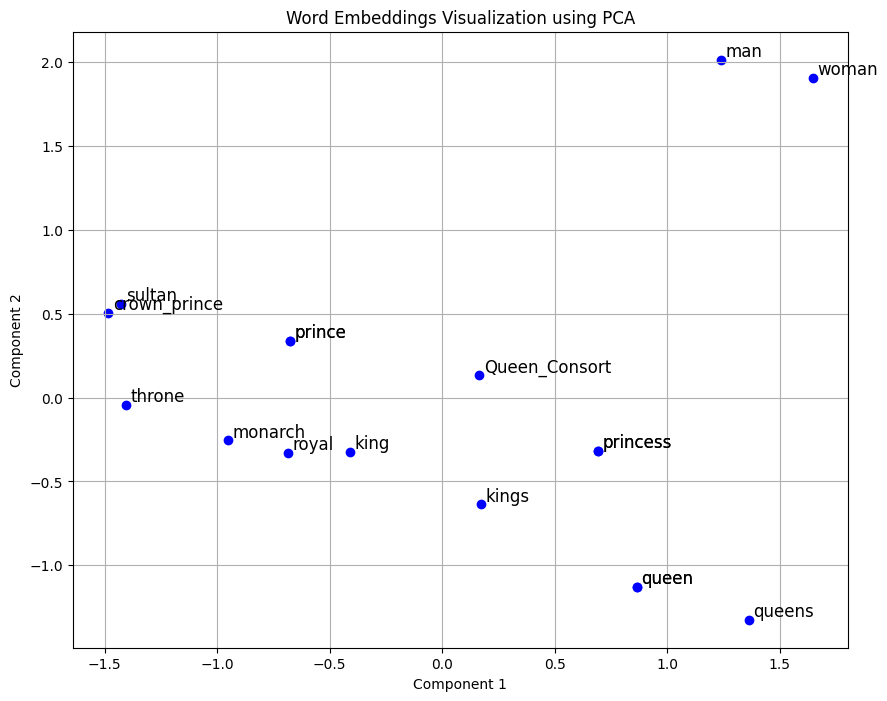

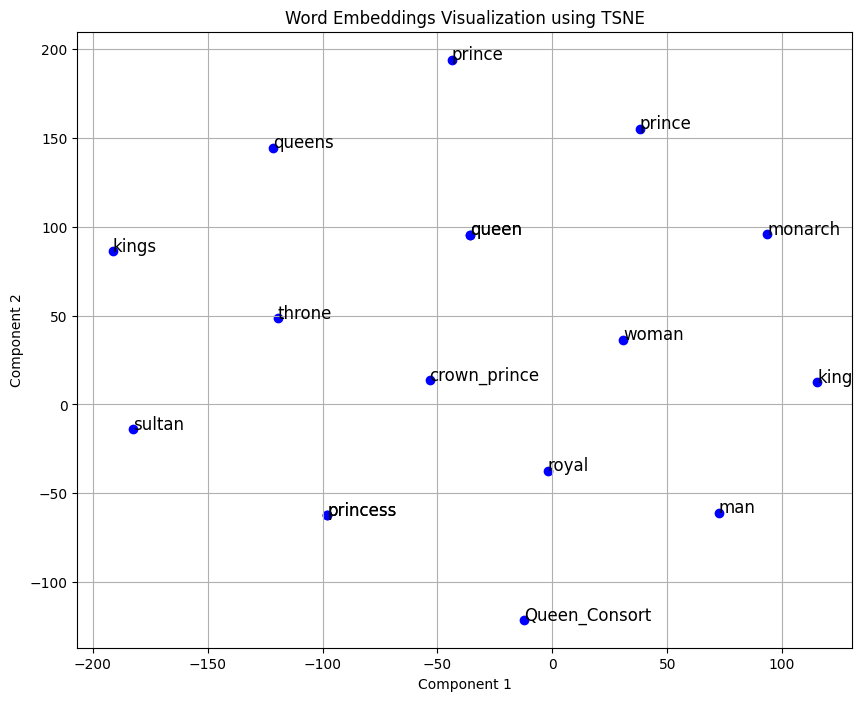

In [1]:
# Install
!pip install gensim numpy matplotlib scikit-learn

# Imports
from gensim.models import KeyedVectors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load pre-trained vectors
print("Loading pre-trained word vectors...")
model_path = "/kaggle/input/google-word2vec/GoogleNews-vectors-negative300.bin"
wv = KeyedVectors.load_word2vec_format(model_path, binary=True)
print("word2vec loaded successfully!")

# Word arithmetic + top similar
def explore(w1, w2, w3):
    vec = wv[w1] - wv[w2] + wv[w3]
    res = [(w, s) for w, s in wv.similar_by_vector(vec, topn=10) if w not in {w1, w2, w3}]
    print(f"\nWord Relationship: {w1} - {w2} + {w3}")
    for w, s in res[:5]:
        print(f"{w}: {s:.4f}")
    return res

# Unified visualization function
def visualize(words, vecs, method='pca', p=None):
    if method == 'tsne':
        p = min(len(words) - 1, 30) if p is None else min(len(words) - 1, p)
        reducer = TSNE(n_components=2, random_state=42, perplexity=p)
    else:
        reducer = PCA(n_components=2)
    coords = reducer.fit_transform(vecs)
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        x, y = coords[i]
        plt.scatter(x, y, color='blue')
        plt.text(x + 0.02, y + 0.02, word, fontsize=12)
    plt.title(f"Word Embeddings Visualization using {method.upper()}")
    plt.xlabel("Component 1"); plt.ylabel("Component 2"); plt.grid(True); plt.show()

# === 2A: Royal family analogy
base_words = ["king", "man", "woman", "queen", "prince", "princess", "royal", "throne"]
related = explore("king", "man", "woman")
words = base_words + [w for w, _ in related]
vecs = np.array([wv[w] for w in words if w in wv])
visualize(words, vecs, 'pca')
visualize(words, vecs, 'tsne')  # p is handled internally

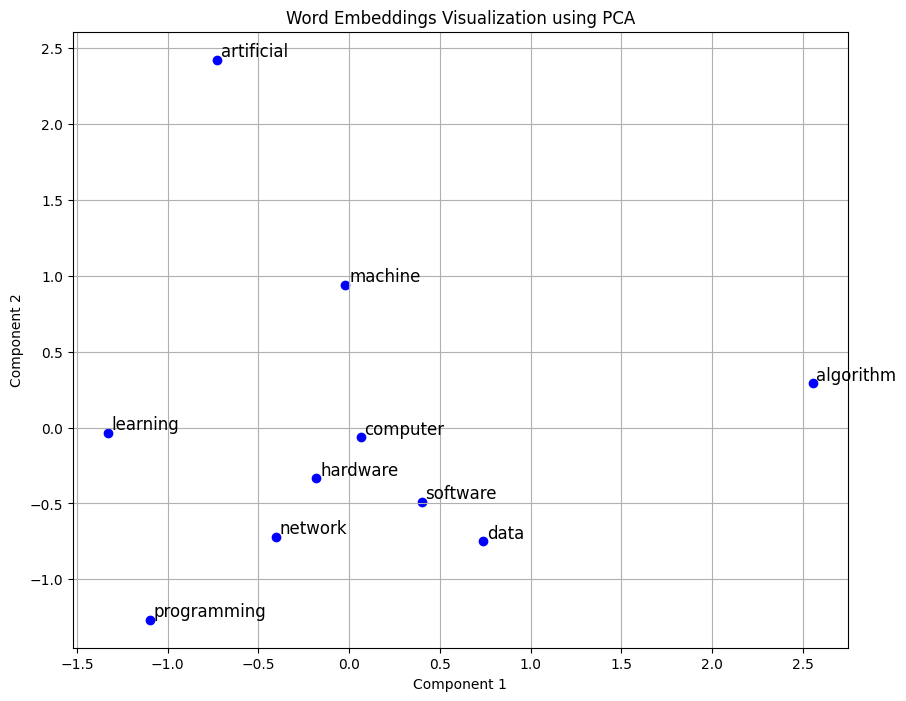

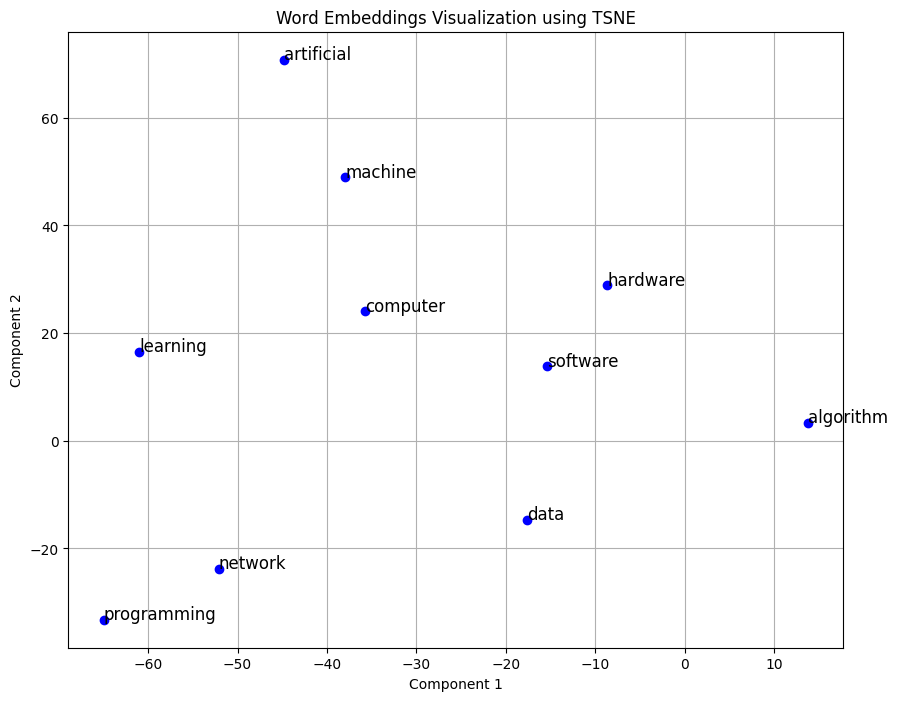


Top 5 semantically similar words to 'computer':
computers: 0.7979
laptop: 0.6640
laptop_computer: 0.6549
Computer: 0.6473
com_puter: 0.6082

Top 5 semantically similar words to 'learning':
teaching: 0.6602
learn: 0.6365
Learning: 0.6208
reteaching: 0.5810
learner_centered: 0.5739


In [2]:
# === 2B: Tech domain
words = ["computer", "software", "hardware", "algorithm", "data", "network",
         "programming", "machine", "learning", "artificial"]
vecs = np.array([wv[w] for w in words if w in wv])
visualize(words, vecs, 'pca')
visualize(words, vecs, 'tsne', p=3)  # explicit override for smaller set

# Similar words
def similar(w):
    print(f"\nTop 5 semantically similar words to '{w}':")
    for w2, s in wv.most_similar(w, topn=5):
        print(f"{w2}: {s:.4f}")

# Examples
similar("computer")
similar("learning")